# General analysis on US accidents

## General analysis with respect to time distribution and diverse weather conditions

### Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [6]:
#read the .csv file to get the data
data = pd.read_csv('./US_Accidents_Dec19.csv')

### Define functions

In [5]:
def which_day(date_time):
    '''
    To find out which weekday according to given timestamp
    input: datetime string with the format of 'yyyy-mm-dd hh:mm:ss'
    return: nth day of the week
    '''

    assert isinstance(date_time, str)
    assert len(date_time) > 0

    from datetime import datetime
    import calendar
    import pandas as pd

    try:
        if type(date_time) is str:
            my_string=date_time.split(' ')[0]
            my_date = datetime.strptime(my_string, "%Y-%m-%d")
            return my_date.weekday()
        else:
            raise Exception("'date_time' has unexpected data type, it is expected to be a sting")

    except Exception as e:
        print(e)


### Plot out the general analysis on bar plots

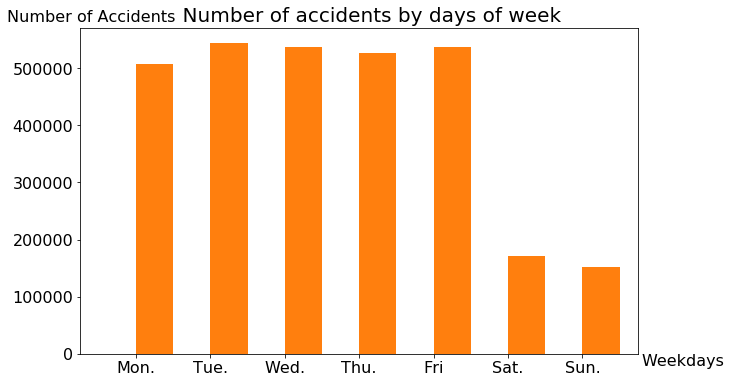

In [7]:
# use the which_day function to find the corresponding weekday
nth_day=[]
date_time=[dt for dt in data['Start_Time']]
for i in range(len(date_time)):
    nth_day.append(which_day(date_time[i]))

# add four new columns 'year', 'month', 'hour', 'weekday'
data['year'] = pd.DatetimeIndex(data['Start_Time']).year
data['month'] = pd.DatetimeIndex(data['Start_Time']).month
data['hour'] = pd.DatetimeIndex(data['Start_Time']).hour
data['weekday']=nth_day

#split data into weekdays and weekends
wday_filt = (data['weekday'].isin([0, 1, 2, 3, 4]))
weekend_filt = (data['weekday'].isin([5, 6]))
data_workday = (data.loc[wday_filt])[['hour']]
data_weekend = (data.loc[weekend_filt])[['hour']]

#plot out accidant data with respect to the weekday distribution
dt_weekday=data.groupby(['weekday'], as_index=False).count().iloc[:,:2]
ax=dt_weekday.plot(kind='bar',rot=0,width=1.0,figsize=(10, 6),fontsize=16,legend=None)
xtick_labels=['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri', 'Sat.', 'Sun.']
ax.set_xticks(list(dt_weekday.index))
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('Weekdays',rotation=0, fontsize=16)
ax.set_ylabel('Number of Accidents',rotation=0, fontsize=16)
ax.set_title('    Number of accidents by days of week', fontsize=20)
ax.xaxis.set_label_coords(1.08,0.00)
ax.yaxis.set_label_coords(0.02,1.01)
plt.savefig('#Accidents_days_of_week.png',transparent=False)
plt.show()

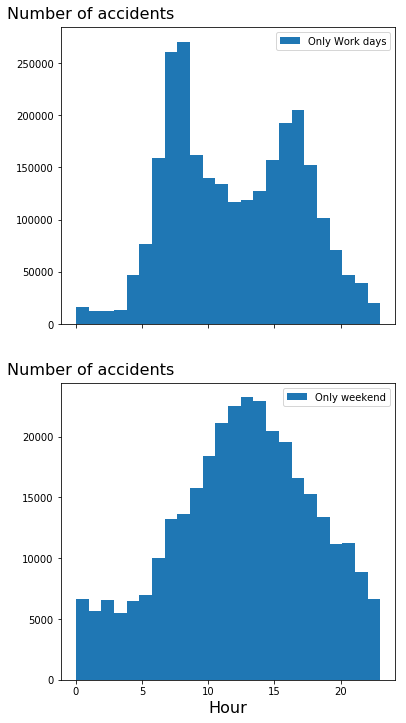

In [7]:
#plot out distributon divided into weekdays and weekends
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(6, 12),sharex=True)
ax0,ax1=axes.flatten()
kwargs = dict(bins=24,density=False,histtype='stepfilled',linewidth=3)
ax0.hist(list(data_workday['hour']),**kwargs,label='Only Work days')
ax0.set_ylabel('Number of accidents',fontsize=16,rotation=0)
ax0.yaxis.set_label_coords(0.09,1.02)
ax1.hist(list(data_weekend['hour']),**kwargs,label='Only weekend')
ax1.set_ylabel('Number of accidents',fontsize=16,rotation=0)
ax1.set_xlabel('Hour',fontsize=16)
ax1.yaxis.set_label_coords(0.09,1.02)
ax0.legend(); ax1.legend()
plt.savefig('hourly_distribution_US.png',transparent=True)
plt.show()

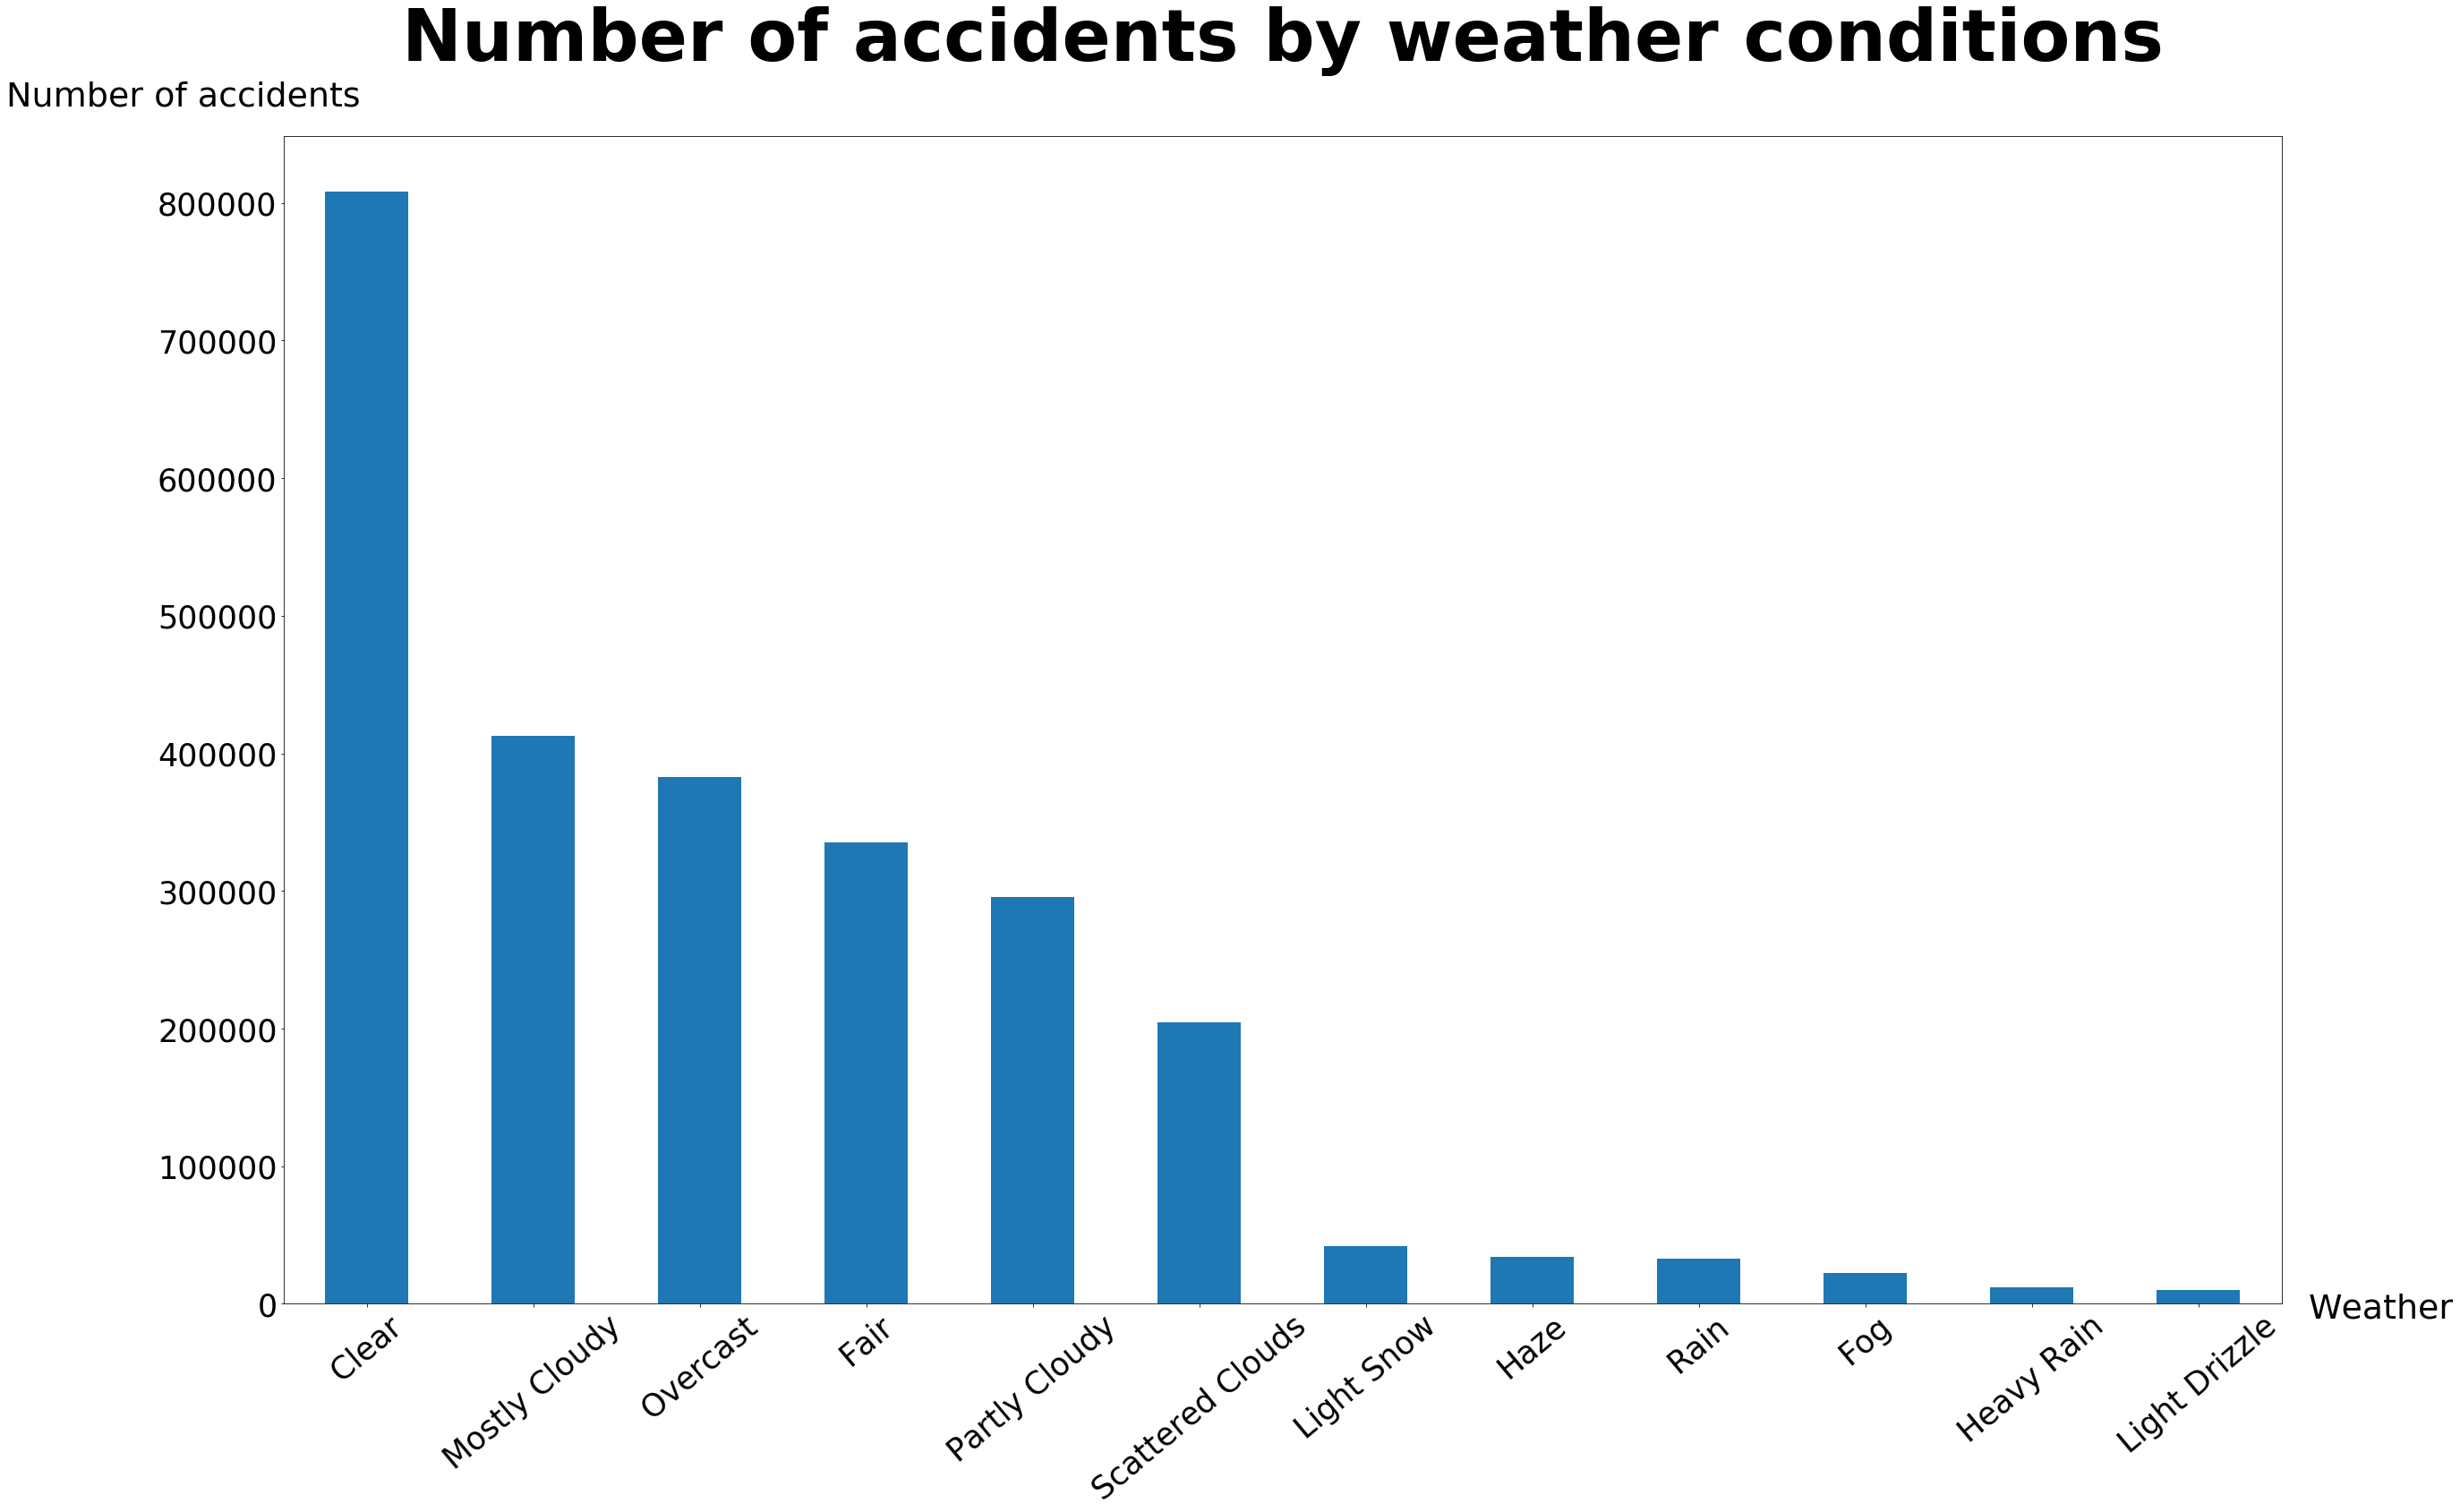

In [9]:
#Visulize the weather condition data through a horizontal bar plot
Weather = data.Weather_Condition.value_counts()
Weather_plt=Weather[['Clear','Mostly Cloudy','Overcast','Fair','Partly Cloudy','Scattered Clouds','Light Snow','Haze','Rain','Fog','Heavy Rain','Light Drizzle']]
#Weather_plt['Cloudy'] = pd.DataFrame.combine(Weather_plt['Partly Cloudy'],Weather_plt['Scattered Clouds'])
plt.figure(figsize=(24, 18))
ax = Weather_plt.plot(kind="bar", rot=40, figsize=(40,24), fontsize=35, color='C0')
ax.set_xlabel("Weather", rotation = 0, fontsize=38)
ax.set_ylabel("Number of accidents", rotation = 0, fontsize=38)
ax.xaxis.set_label_coords(1.05,0.01)
ax.yaxis.set_label_coords(-0.05,1.02)
plt.title("Number of accidents by weather conditions", fontdict = {'fontsize': 80}, weight = 'bold', y=1.06)
plt.savefig('weather_US_horizontal.png', transparent=False)
plt.show()